In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)

'''
In 'data' all unknown BCUs are assigned 0. 
All BLLs are assigned 1 and all FSRQs are assigned 2.
Radio Galaxies = 3 and Other = 4
'''

mask1 = data['CLASS1'] == 4
mask2 = data['CLASS1'] == 0
mask3 = data['CLASS1'] == 3
data = data[~mask1]
data = data[~mask2]
data = data[~mask3]

''' JOINING BLLs AND FSRQs INTO A SINGLE CATEGORY '''

#data = data.replace(2,1)

data = data.dropna()
data = data.reset_index()

print(len(data['CLASS1']))
data_test = data[~(data['CLASS1'] == 1)]
print(len(data_test['CLASS1']))
print(data.columns)

1383
470
Index(['index', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Energy_Flux100',
       'PL_Flux_Density', 'PL_Index', 'LP_Flux_Density', 'LP_Index', 'LP_beta',
       'LP_SigCurv', 'LP_EPeak', 'PLEC_Flux_Density', 'PLEC_IndexS',
       'PLEC_ExpfactorS', 'PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred',
       'Variability_Index', 'Frac_Variability', 'ASSOC_PROB_BAY',
       'ASSOC_PROB_LR', 'Flux_Band_0', 'Flux_Band_1', 'Flux_Band_2',
       'Flux_Band_3', 'Flux_Band_4', 'Flux_Band_5', 'Flux_Band_6',
       'Flux_Band_7', 'nuFnu_Band_0', 'nuFnu_Band_1', 'nuFnu_Band_2',
       'nuFnu_Band_3', 'nuFnu_Band_4', 'nuFnu_Band_5', 'nuFnu_Band_6',
       'nuFnu_Band_7', 'Sqrt_TS_Band_2', 'Sqrt_TS_Band_3', 'Sqrt_TS_Band_4',
       'Sqrt_TS_Band_5', 'Flux_History_0', 'Flux_History_1', 'Flux_History_2',
       'Flux_History_3', 'Flux_History_4', 'Flux_History_5', 'Flux_History_6',
       'Flux_History_7', 'Sqrt_TS_History_0', 'Sqrt_TS_History_1',
       'Sqrt_TS_History_2', 'Sqrt_TS_History_3', 'Sq

C:\Users\ioanp\AppData\Local\Temp\ipykernel_9160\1457274526.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask2]
C:\Users\ioanp\AppData\Local\Temp\ipykernel_9160\1457274526.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~mask3]


We will split the dataset (obtained from sklearn load_digits) into a training and test set using the code below 

In [18]:

X = data.loc[:, data.columns != 'CLASS1']
Y = data['CLASS1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4) 
# test_size set the proportion of data to use as test data. The rest of the data will be used as training data

'''HIGHLY RECOMMENDED TO SCALE TRAINING DATA '''

scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

hl_list = []
for i in range(12,14):
    hl_list.append((int(i),int(2)))





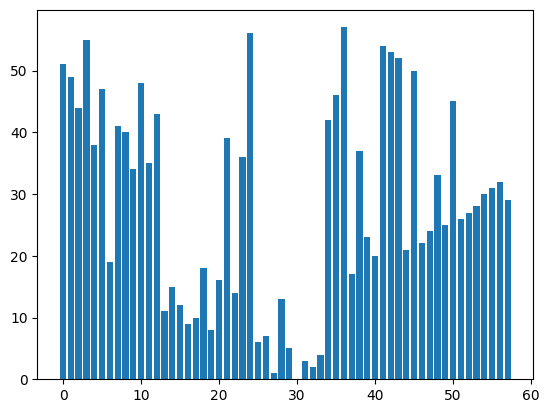

In [19]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

ranks = fisher_score.fisher_score(np.array(X),np.array(Y))

#print(ranks)
#print(data.columns)
#print(ranks,np.array(data.columns))
feat_importances = pd.DataFrame((np.array([ranks, np.array(X.columns)]).T),columns=['ranks','features'])

fig, ax = plt.subplots()
xs = np.linspace(0,1,len(feat_importances.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs ,feat_importances['ranks'], width =0.8)

plt.show()

#fisher = pd.DataFrame((feat_importances),columns=['features','fisher score'])
#feat_importances.head

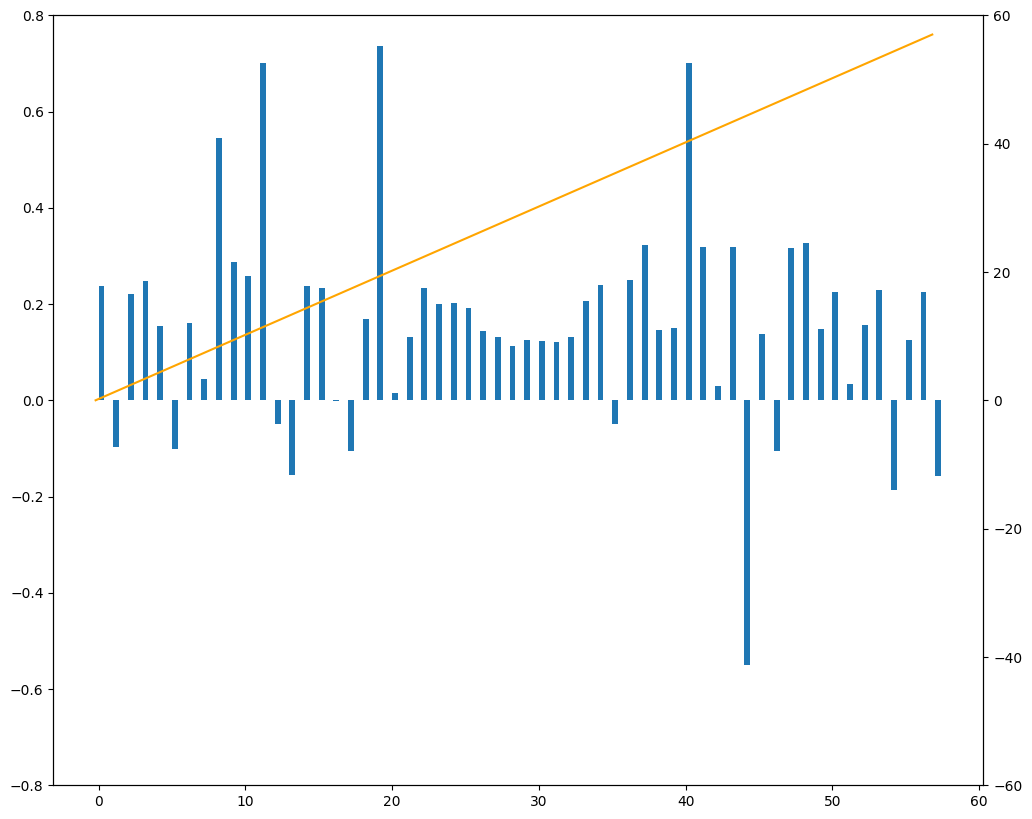

In [20]:
from sklearn.feature_selection import r_regression

ranks = r_regression(X,Y)

''' 
Pearson's 'r' calculated as E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))
'''


pearson = pd.DataFrame((np.array([ranks, np.array(X.columns)]).T),columns=['pearson','features'])
var_ranking = pd.merge(pearson,feat_importances, on = 'features')
var_ranking = var_ranking.sort_values(by='ranks')
#print(var_ranking)

fig, ax = plt.subplots(figsize=(12,10))
ax1 = ax.twinx()
xs = np.linspace(0,1,len(pearson.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs+0.2 ,var_ranking['pearson'], width =0.4)
ax.set_ylim(-0.8,0.8)
ax1.set_ylim(-60,60)
ax1.plot(xs-0.2,var_ranking['ranks'],color = 'orange')



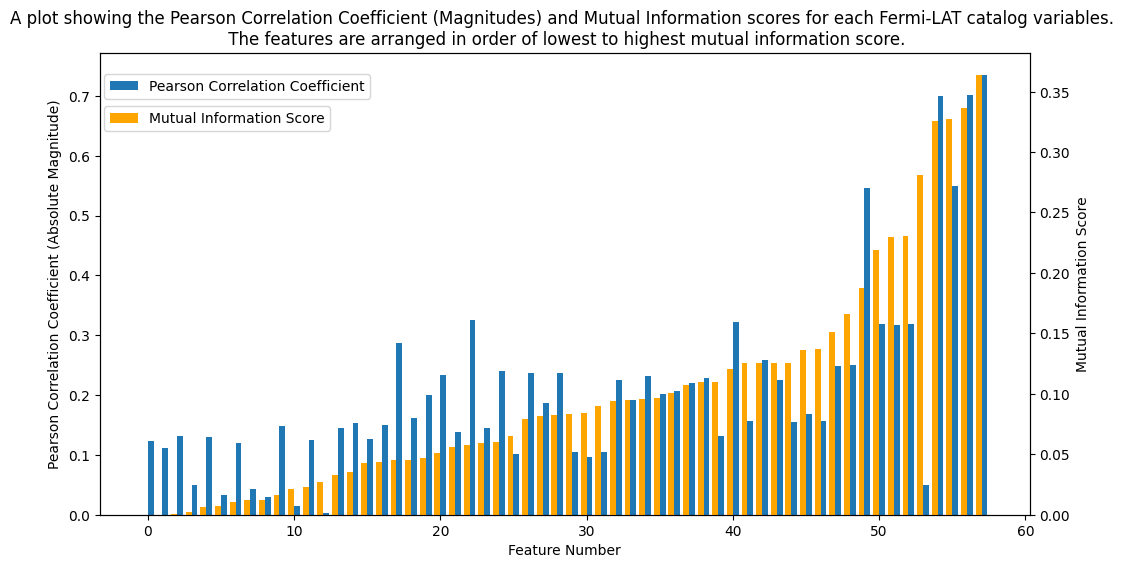

In [21]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X,Y)


''' 
Mutual info classification for each variable
'''


mutual = pd.DataFrame((np.array([mi, np.array(X.columns)]).T),columns=['mutual information','features'])
var_ranking1 = pd.merge(mutual,var_ranking, on = 'features')
var_ranking1 = var_ranking1.sort_values(by='mutual information')
#print(var_ranking)

plt.style.use('default')

fig, ax = plt.subplots(figsize=(12,6))
ax1 = ax.twinx()
xs = np.linspace(0,1,len(pearson.value_counts()))
xs = np.arange(0,len(np.array(X.T)),1)
ax.bar(xs+0.2 ,abs(var_ranking1['pearson']), width =0.4, label = 'Pearson Correlation Coefficient')
#ax.set_ylim(0,1)
#ax.set_ylim(0,1)
ax1.set_ylabel('Mutual Information Score')
ax.set_ylabel('Pearson Correlation Coefficient (Absolute Magnitude)')
ax.set_xlabel('Feature Number')
ax1.bar(xs-0.2,var_ranking1['mutual information'],width=0.4,color = 'orange', label = 'Mutual Information Score')
ax.set_title('A plot showing the Pearson Correlation Coefficient (Magnitudes) and Mutual Information scores for each Fermi-LAT catalog variables. \n The features are arranged in order of lowest to highest mutual information score.')
ax.legend(loc = (0.005,0.9))
ax1.legend(loc = (0.005,0.83))

In [22]:
from sklearn.model_selection import GridSearchCV

model_parameters = {
        'hidden_layer_sizes':hl_list,
        'activation':['tanh','relu'],
        'solver':['sgd','adam'],
        'alpha':[0.0001,0.001,0.00001],
        'learning_rate':['constant','invscaling','adaptive']
}

clf = GridSearchCV(NN, model_parameters, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Best paramete set
#print('Best parameters found:\n', clf.best_params_)
'''
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
'''    
#NN.fit(x_train, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (13, 2), 'learning_rate': 'constant', 'solver': 'sgd'}


In [23]:
from sklearn.ensemble import BaggingClassifier

NN = MLPClassifier(activation='relu', alpha= 0.0001, hidden_layer_sizes=(13, 2), learning_rate='constant', solver='sgd', random_state=1, max_iter=1000)
NN.fit(x_train, y_train)

'Making use of the above algorithm with bagging implemented'

BNN = BaggingClassifier(estimator=NN,n_estimators=100,bootstrap=True)
BNN.fit(x_train,y_train)

C:\Users\ioanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


BaggingClassifier(estimator=MLPClassifier(hidden_layer_sizes=(13, 2),
                                          max_iter=1000, random_state=1,
                                          solver='sgd'),
                  n_estimators=100)

Now testing the model:

In [24]:
y_pred = NN.predict(x_test)
y_proba = NN.predict_proba(x_test)

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
print('The Neural Network accuracy is ' + str(accuracy))
print('The Neural Network Confusion Matrix is:')
print(confusion)

'''The neural network accuracy initially decreases when bagging
is implemented, suggesting that the data has a high bias'''

b_y_pred = BNN.predict(x_test)
b_y_proba = BNN.predict_proba(x_test)

b_accuracy = accuracy_score(y_test, b_y_pred)*100
b_confusion = confusion_matrix(y_test, b_y_pred)
print('The Bagged Neural Network accuracy is ' + str(b_accuracy))
print('The Bagged Neural Network Confusion Matrix is:')
print(b_confusion)

The Neural Network accuracy is 91.80722891566265
The Neural Network Confusion Matrix is:
[[257  10]
 [ 24 124]]
The Bagged Neural Network accuracy is 90.8433734939759
The Bagged Neural Network Confusion Matrix is:
[[254  13]
 [ 25 123]]


0          (0.958, 1.0]
1        (0.667, 0.708]
2      (-0.001, 0.0417]
3      (-0.001, 0.0417]
4      (-0.001, 0.0417]
             ...       
410    (-0.001, 0.0417]
411    (-0.001, 0.0417]
412        (0.958, 1.0]
413    (-0.001, 0.0417]
414    (-0.001, 0.0417]
Name: p_2, Length: 415, dtype: category
Categories (24, interval[float64, right]): [(-0.001, 0.0417] < (0.0417, 0.0833] < (0.0833, 0.125] < (0.125, 0.167] ... (0.833, 0.875] < (0.875, 0.917] < (0.917, 0.958] < (0.958, 1.0]]


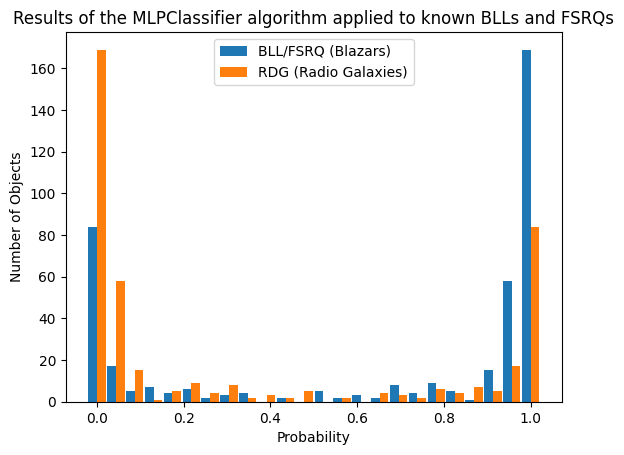

In [25]:
import matplotlib.pyplot as plt
#print(y_proba)
probs = pd.DataFrame(y_proba,columns=('p_1','p_2'))
bin_probs_1 = pd.cut(probs['p_1'],np.linspace(0,1,25),include_lowest=True)
bin_probs_2 = pd.cut(probs['p_2'],np.linspace(0,1,25    ),include_lowest=True)

print(bin_probs_2)

fig, ax = plt.subplots()
x_axis = np.linspace(0,1,len(bin_probs_1.value_counts()))

ax.bar(x_axis-0.01,bin_probs_1.value_counts(sort=False), width=0.02,label='BLL/FSRQ (Blazars)')
ax.bar(x_axis+0.01,bin_probs_2.value_counts(sort=False),width=0.02,label='RDG (Radio Galaxies)')
ax.legend()
ax.set_xlabel('Probability')
ax.set_ylabel('Number of Objects')
ax.set_title('Results of the MLPClassifier algorithm applied to known BLLs and FSRQs')

plt.show()